In [ ]:


Attempting to replicate the success of the Microsoft Machine Learning exercise found at the URL below:
    
    https://www.microsoft.com/developerblog/2017/06/29/iot-sports-sensor-machine-learning-helps-amateurs-up-their-game/
        
And the code (in R) on the GitHub account at the location below:
    
    https://github.com/CatalystCode/sportssensor
    
    

In [ ]:

Notes
Explore the data.
Visualtion may prove useless due to significant number of variables to start with.

Need to use:
    Feature selection
    Decision trees
    Try k NN?? but are there too many features??
    Ensembles
    

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load data
#ski_data = pd.read_csv('ski_feature_set.csv')
ski_data = pd.read_csv('ski_feature_set.csv')
ski_data.head()

,experiment_id,experiment_date,experiment_time,seg,head_a_x_median,head_a_x_std,head_a_x_max,head_a_x_min,head_a_x_first_q,head_a_x_third_q,...,FootCor_x,FootCor_y,FootCor_z,ForeArmCor_x,ForeArmCor_y,ForeArmCor_z,ShoulderCor_x,ShoulderCor_y,ShoulderCor_z,SkillLevel
0,4,4/18/2017 12:00:00 AM,10:01:25,1,-0.669167,3.644610,10.419883,-13.228041,-2.281913,1.099972,...,0.994897,0.984232,0.999571,0.899980,0.964129,0.998268,0.999479,0.999961,0.999984,Pro
1,4,4/18/2017 12:00:00 AM,10:01:27,2,6.027845,6.301212,15.596765,-15.995895,-0.937375,8.541274,...,0.999900,0.999627,0.999830,0.999129,0.996789,0.997870,0.999998,0.999993,0.999967,Pro
2,4,4/18/2017 12:00:00 AM,10:01:29,3,-3.331901,5.853615,14.465590,-14.584476,-7.578265,0.746837,...,0.999455,0.999364,0.998499,0.991797,0.987995,0.980585,0.999997,0.999977,0.999969,Pro
3,4,4/18/2017 12:00:00 AM,10:01:31,4,4.745339,6.078155,22.053890,-11.899861,0.468133,8.832448,...,0.998750,0.999739,0.998607,0.971034,0.990780,0.974136,0.999958,0.999957,0.999904,Pro
4,4,4/18/2017 12:00:00 AM,10:01:33,5,-4.108063,6.549189,10.578600,-19.892439,-7.955218,1.504396,...,0.999948,0.999674,0.999405,0.999245,0.994915,0.991531,0.999999,0.999991,0.999953,Pro


In [8]:
print(ski_data['SkillLevel'].unique())

# Need to translate the SkillLevel field into a binary data field with 1 and 0.
# Pro should be 1, Guggs (which represents amateurs) needs to be 0

['Pro' 'Guggs']


In [13]:
# convert car to 0 and truck to 1
# vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})

# convert Guggs to 0 and Pro to 1
ski_data['SkillLevel'] = ski_data.SkillLevel.map({'Guggs':0, 'Pro':1})

,experiment_id,seg,head_a_x_median,head_a_x_std,head_a_x_max,head_a_x_min,head_a_x_first_q,head_a_x_third_q,head_a_x_constant,head_a_x_lowband,...,FootCor_x,FootCor_y,FootCor_z,ForeArmCor_x,ForeArmCor_y,ForeArmCor_z,ShoulderCor_x,ShoulderCor_y,ShoulderCor_z,SkillLevel
experiment_id,1.000000,-0.031855,-0.049557,0.410931,0.225482,-0.288375,-0.237270,0.166943,0.085416,0.083373,...,0.045253,0.075466,0.066280,0.042472,0.000241,-0.029664,0.038158,0.028245,-0.042079,0.572762
seg,-0.031855,1.000000,0.031042,-0.058454,-0.090769,0.175212,0.049709,0.005317,-0.071717,-0.268316,...,0.002359,-0.014566,0.061746,0.024945,0.025913,0.084721,0.007627,-0.034395,0.023297,-0.246324
head_a_x_median,-0.049557,0.031042,1.000000,0.010333,0.301242,0.286311,0.809136,0.799636,0.076363,0.018084,...,-0.034597,-0.055838,0.020024,0.010376,0.018274,0.063366,-0.011171,0.015453,0.031183,0.007402
head_a_x_std,0.410931,-0.058454,0.010333,1.000000,0.662814,-0.736668,-0.492539,0.525845,0.231685,0.262437,...,0.304725,0.305468,0.272637,0.202718,0.058327,0.049300,0.148006,0.071670,-0.081110,0.513390
head_a_x_max,0.225482,-0.090769,0.301242,0.662814,1.000000,-0.496508,0.004322,0.543722,0.283763,0.481270,...,0.226868,0.231510,0.250164,0.188914,0.128286,0.132366,0.119117,0.057020,0.041029,0.300611
head_a_x_min,-0.288375,0.175212,0.286311,-0.736668,-0.496508,1.000000,0.576962,-0.063868,-0.262483,-0.430494,...,-0.236448,-0.271598,-0.242942,-0.183548,-0.130588,-0.104469,-0.117333,-0.074942,-0.004517,-0.401400
head_a_x_first_q,-0.237270,0.049709,0.809136,-0.492539,0.004322,0.576962,1.000000,0.400782,-0.024949,-0.095423,...,-0.176994,-0.192945,-0.104396,-0.056605,0.026792,0.058243,-0.073800,-0.022421,0.111204,-0.235497
head_a_x_third_q,0.166943,0.005317,0.799636,0.525845,0.543722,-0.063868,0.400782,1.000000,0.170851,0.119379,...,0.125723,0.099509,0.125042,0.105821,-0.002139,0.023382,0.067509,0.041222,-0.072854,0.252566
head_a_x_constant,0.085416,-0.071717,0.076363,0.231685,0.283763,-0.262483,-0.024949,0.170851,1.000000,0.494571,...,0.124603,0.099920,0.141017,0.176166,0.133735,0.157177,0.067791,0.056349,0.101233,0.167269
head_a_x_lowband,0.083373,-0.268316,0.018084,0.262437,0.481270,-0.430494,-0.095423,0.119379,0.494571,1.000000,...,0.092709,0.104919,0.126491,0.088623,0.081057,0.096114,0.045902,0.039067,0.040803,0.118260


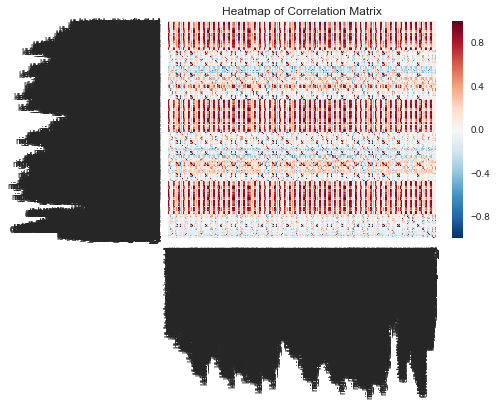

In [15]:
# Plot a Correlation Matrix:
corr = ski_data.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

In [16]:
# Extract 'SkillLevel' column, because 'SkillLevel' is our target value:
corr_skill = pd.DataFrame(corr['SkillLevel'].drop('SkillLevel'))
corr_skill.sort_values(by = 'SkillLevel', ascending = False)

,SkillLevel
trunk_twist_max,0.847235
trunk_twist_third_q,0.802010
trunk_twist_median,0.729310
right_shoulder_q_z_max,0.671127
trunk_orth_z_std,0.666555
difflowertoupperbody_x_max,0.663027
right_shoulder_q_z_third_q,0.661559
trunk_twist_first_q,0.661378
pelvis_q_z_max,0.659154
pelvis_a_z_std,0.651977


In [11]:
# Train-Test split:

from sklearn.model_selection import train_test_split

data = ski_data.drop('SkillLevel', 1)
label = ski_data.SkillLevel
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.2, random_state = 42)